<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/Versiones/EyCD_TP_Parte_1_Gr23_220518_Ale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exporación y curación de Datos**


*Edición 2022*

---
# Trabajo práctico entregable - Parte 1 - Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

Empezamos instalando algunas librerías que nos pueden ser de utilidad:

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

#pip install python-decouple
#from decouple import config
from sqlalchemy import create_engine, text

import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

## Ejercicio 1: SQL

 

1.   Crear una base de datos en SQLite utilizando la libreria SQLalchemy. https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:
  *   cantidad de registros totales por ciudad.
  *   cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

**Respuesta**

Creamos la base de datos con la siguiente línea de código:

In [2]:
engine = create_engine('sqlite:///melb_data.sqlite3', echo=True)

Para ingestar los datos de Melbourne y airbnb a la base de datos que acabamos de crear, leemos las URLs provistas en clase que contienen los respectivos csv con los datasets solicitados.

In [3]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [4]:
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Aqui nos trae una alerta de columnas con datos mixtos. Chequeamos las columnas que tengan más de un data type:

In [5]:
data_types = airbnb_df.applymap(type).nunique() > 1
data_types_df = pandas.DataFrame(data_types, columns=['mixed_types'])

In [6]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_types_df)

                                  mixed_types
id                                      False
listing_url                             False
scrape_id                               False
last_scraped                            False
name                                     True
summary                                  True
space                                    True
description                              True
neighborhood_overview                    True
notes                                    True
transit                                  True
access                                   True
interaction                              True
house_rules                              True
picture_url                             False
host_id                                 False
host_url                                False
host_name                                True
host_since                               True
host_location                            True
host_about                        

Como vamos a tener que unir los dos dataset usando Postalcode = zipcode, nos interesa que zipcode en la tabla de airbnb tenga un único data type. Para esto usamos la siguiente línea de código:

In [7]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

Ingestamos los datos de `melb_df` a una tabla llamada `melb_data`:

In [8]:
melb_df.to_sql('melb_data', con=engine, if_exists="replace")

2022-05-18 15:47:34,794 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-05-18 15:47:34,797 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:34,803 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_data")
2022-05-18 15:47:34,807 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:34,848 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-18 15:47:34,856 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_data (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-18 15:47:34,858 INFO sqlalchemy.engine.Engine [no key 0.00271s] ()
2022-05-18 15:47:34,879 INFO sqlal

Luego ingestamos los datos de `airbnb_df` a una tabla llamada `airbnb_data`:

In [9]:
airbnb_df.to_sql('airbnb_data', con=engine, if_exists="replace")

2022-05-18 15:47:36,736 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-05-18 15:47:36,742 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:36,754 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_data")
2022-05-18 15:47:36,763 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:36,799 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-18 15:47:36,828 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_data (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TE

A continuación creamos las queries solicitadas en la consigna:
*   `query1`: cantidad de registros totales por ciudad.
*   `query2`: cantidad de registros totales por barrio y ciudad.

Recordamos las columnas que había en los dataframes:

In [10]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
airbnb_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

En el dataset `airbnb_df` tenemos una columna ciudad (`city`) y otra barrio (`neighborhood`). En el dataset de `melb_df` no estan las columnas con esos nombres exactos, pero tomaremos la columna `CouncilArea` como ciudad y `Suburb` como barrio.

Vemos la cantidad de filas que tiene cada dataframe:

In [12]:
melb_df.shape[0]

13580

In [13]:
airbnb_df.shape[0]

22895

Profundizamos el análisis de las columnas viendo nulos y ceros de cada una en ambas tablas. Para eso creamos una función `status`:

In [14]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

Analizamos nulos, ceros y únicos para `melb_df`:

In [15]:
status(melb_df) 

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,314,object
1,Address,0,0.000000,0,0.000000,13378,object
2,Rooms,0,0.000000,0,0.000000,9,int64
3,Type,0,0.000000,0,0.000000,3,object
4,Price,0,0.000000,0,0.000000,2204,float64
5,Method,0,0.000000,0,0.000000,5,object
6,SellerG,0,0.000000,0,0.000000,268,object
7,Date,0,0.000000,0,0.000000,58,object
8,Distance,0,0.000000,6,0.000442,202,float64
9,Postcode,0,0.000000,0,0.000000,198,float64


Aquí ya podemos observar que la columna `CouncilArea` tiene 33 valores únicos y la columna `Suburb` tiene 314, por lo que los resultados de la segunda query solicitada (que cruza estas dos columnas) va a ser extensa (33 x 314). Además observamos que CouncilArea tiene 1369 datos faltantes (un 10% del total de records: 13580). Vemos los 33 `CouncilArea` y sus frecuencias:

In [16]:
melb_df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

Vemos los 314 `Suburb` y sus frecuencias:

In [17]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(melb_df['Suburb'].value_counts())

Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
Essendon              220
South Yarra           202
Glen Iris             195
Hawthorn              191
Coburg                190
Northcote             188
Brighton              186
Kew                   177
Pascoe Vale           171
Balwyn North          171
Yarraville            164
St Kilda              162
Glenroy               159
Port Melbourne        153
Moonee Ponds          149
Carnegie              146
Bentleigh             139
Thornbury             139
Brighton East         138
Newport               137
Footscray             132
Camberwell            132
Elwood                131
Ascot Vale            130
Hampton               130
Surrey Hills          125
Prahran               123
Keilor East           121
Hawthorn East         119
Kensington            117
Malvern East          117
Doncaster             116
Sunshine              111
Brunswick We

Ahora analizamos nulos, ceros y únicos para `airbnb_df`:

In [18]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(status(airbnb_df)) 

                            variable  q_nan     p_nan  q_zeros   p_zeros  \
0                                 id      0  0.000000        0  0.000000   
1                        listing_url      0  0.000000        0  0.000000   
2                          scrape_id      0  0.000000        0  0.000000   
3                       last_scraped      0  0.000000        0  0.000000   
4                               name      3  0.000131        0  0.000000   
5                            summary    696  0.030400        0  0.000000   
6                              space   6051  0.264294        0  0.000000   
7                        description    332  0.014501        0  0.000000   
8              neighborhood_overview   8471  0.369993        0  0.000000   
9                              notes  11349  0.495698        0  0.000000   
10                           transit   7952  0.347325        0  0.000000   
11                            access   7727  0.337497        0  0.000000   
12          

Aquí observamos que la columna `neighborhood` tiene 59 valores únicos y la columna `city` tiene 30, por lo que en este caso el cruce de ambas para la segunda query quedará más acotado que en el caso anterior. Además observamos que `neighborhood` tiene 5813 datos faltantes (un 25% del total). Vemos los 59 `neighborhood` y sus frecuencias:

In [19]:
airbnb_df['neighborhood'].value_counts()

Central Business District     3726
Southbank                     1248
St Kilda                      1085
South Yarra                   1053
Brunswick                      728
Carlton                        585
Docklands                      576
Richmond                       547
Fitzroy                        381
Elwood                         309
Northcote                      309
Caulfield                      302
South Melbourne                292
North Melbourne                290
Collingwood                    283
Hawthorn                       261
Prahran                        257
Abbotsford                     254
Footscray                      253
Port Melbourne                 251
Fitzroy North                  231
Brighton                       205
St Kilda East                  200
Prahran/Windsor                195
East Melbourne                 188
Flemington                     178
Windsor                        167
Preston                        164
Carnegie            

Vemos las 30 ciudades (`city`) y sus frecuencias:

In [20]:
airbnb_df['city'].value_counts()

Melbourne            7368
Port Phillip         2808
Yarra                2049
Stonnington          1621
Moreland              967
Yarra Ranges          771
Darebin               698
Boroondara            664
Glen Eira             631
Whitehorse            614
Monash                571
Maribyrnong           436
Wyndham               426
Bayside               375
Moonee Valley         344
Manningham            313
Kingston              309
Hobsons Bay           239
Banyule               203
Frankston             177
Knox                  175
Hume                  170
Casey                 153
Greater Dandenong     147
Whittlesea            137
Cardinia              123
Maroondah             115
Brimbank              108
Melton                 95
Nillumbik              88
Name: city, dtype: int64

Generamos las queries requeridas en la consigna para cada dataset:

In [21]:
query1_melb = """
SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1
"""
query2_melb = """
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1,2
"""

query1_airbnb = """
SELECT city as Ciudad, COUNT(1) as Registros
FROM airbnb_data 
GROUP BY 1
"""


query2_airbnb = """
SELECT city as Ciudad, neighborhood as Barrio, COUNT(1) as Registros
FROM airbnb_data 
GROUP BY 1,2
"""

queries = [query1_melb, query2_melb, query1_airbnb, query2_airbnb]

Vemos los resultados de las queries que creamos:

In [22]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-05-18 15:47:56,766 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1

2022-05-18 15:47:56,774 INFO sqlalchemy.engine.Engine [raw sql] ()

SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1

(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-05-18 15:47:56,813 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, Subur

Como ya habíamos observado, la segunda query de melb_data muestra varios barrios dentro sin ciudad (CouncilArea = `None`), y la segunda query de airbnb_data muestra varias ciudades sin barrio (Neighborhood = `None`). Podríamos plantearnos queries alternativas que excluyan dichos valores:

In [23]:
query3_melb = """
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2
"""

query3_airbnb = """
SELECT city as Ciudad, neighborhood as Barrio, COUNT(1) as Registros
FROM airbnb_data 
WHERE neighborhood != 'None'
GROUP BY 1,2
"""

alt_queries = [query3_melb, query3_airbnb]


In [24]:
with engine.connect() as con:
    for query in alt_queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-05-18 15:47:57,762 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2

2022-05-18 15:47:57,796 INFO sqlalchemy.engine.Engine [raw sql] ()

SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2

('Banyule', 'Bellfield', 15)
('Banyule', 'Briar Hill', 5)
('Banyule', 'Bundoora', 13)
('Banyule', 'Eaglemont', 22)
('Banyule', 'Eltham North', 2)
('Banyule', 'Greensborough', 21)
('Banyule', 'Heidelberg', 50)
('Banyule', 'Heidelberg Heights', 76)
('Banyule', 'Heidelberg West', 74)
('Banyule', 'Ivanhoe', 97)
('Banyule', 'Ivanhoe East', 23)
('Banyule', 'Lower Plenty', 5)
('Banyule', 'Montmorency', 15)
('Banyule', 'Preston', 1)
('Banyule', 'Rosanna', 54)
('Banyule', 'St Helena', 2)
('Banyule', 'Viewbank', 38)
('Banyule', 'Watsonia', 49)
('Banyule', 'Watsonia North', 9)
('Banyule', 'Yallambie', 23)
('Bayside', 'Beauma

Para obtener los mismos resultados de la clase al combinar los datasets de ambas tablas, tomamos como columnas relevantes de la tabla airbnb las siguientes:

*   `zipcode`
*   Promedio de `price` por zipcode
*   Promedio de `weekly_price` por zipcode
*   Promedio de `monthly_price` por zipcode

In [25]:
agg_airbnb_query = """
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
"""

In [26]:
agg_airbnb_df = pandas.read_sql(agg_airbnb_query, engine)

2022-05-18 15:47:58,339 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
")
2022-05-18 15:47:58,358 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:58,369 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
")
2022-05-18 15:47:58,382 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:58,390 INFO sqlalchemy.engine.Engine 
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_me

A continuación ingestamos esta nueva tabla con datos agregados/transformados en nuestra base de datos:

In [27]:
agg_airbnb_df.to_sql('agg_airbnb_table', con=engine, if_exists="replace")

2022-05-18 15:47:58,816 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("agg_airbnb_table")
2022-05-18 15:47:58,824 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:58,828 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("agg_airbnb_table")
2022-05-18 15:47:58,832 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:58,842 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-18 15:47:58,851 INFO sqlalchemy.engine.Engine 
CREATE TABLE agg_airbnb_table (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-05-18 15:47:58,854 INFO sqlalchemy.engine.Engine [no key 0.00298s] ()
2022-05-18 15:47:58,869 INFO sqlalchemy.engine.Engine CREATE INDEX ix_agg_airbnb_table_index ON agg_airbnb_table ("index")
2022-05-18 15:47:58,870 INFO sqlalchemy.engine.Engine [no key 0.00181s] ()
2022-05-18 15:47:58,883 INFO sqlalchemy.engine.Engine COMMIT
2022-05-18 15:47:

Por último, hacemos la query que combina los datos de airbnb y melb para obtener una tabla como la que obtuvimos en clase.

In [28]:
merged_data = """
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_data.Type, 
melb_data.Price, 
melb_data.Method, 
melb_data.SellerG,
melb_data.Date,
melb_data.Distance,
melb_data.Postcode,
melb_data.Bedroom2,
melb_data.Bathroom,
melb_data.Car,
melb_data.Landsize,
melb_data.BuildingArea,
melb_data.YearBuilt,
melb_data.CouncilArea,
melb_data.Lattitude,
melb_data.Longtitude,
melb_data.Regionname,
melb_data.Propertycount,
agg_airbnb_table.zipcode,
agg_airbnb_table.airbnb_price_mean,
agg_airbnb_table.airbnb_record_count,
agg_airbnb_table.airbnb_weekly_price_mean,
agg_airbnb_table.airbnb_monthly_price_mean
FROM melb_data 
JOIN agg_airbnb_table
ON melb_data.Postcode = agg_airbnb_table.zipcode
"""

In [29]:
merged_df = pandas.read_sql(merged_data,
            engine)

2022-05-18 15:47:59,067 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_data.Type, 
melb_data.Price, 
melb_data.Method, 
melb_data.SellerG,
melb_data.Date,
melb_data.Distance,
melb_data.Postcode,
melb_data.Bedroom2,
melb_data.Bathroom,
melb_data.Car,
melb_data.Landsize,
melb_data.BuildingArea,
melb_data.YearBuilt,
melb_data.CouncilArea,
melb_data.Lattitude,
melb_data.Longtitude,
melb_data.Regionname,
melb_data.Propertycount,
agg_airbnb_table.zipcode,
agg_airbnb_table.airbnb_price_mean,
agg_airbnb_table.airbnb_record_count,
agg_airbnb_table.airbnb_weekly_price_mean,
agg_airbnb_table.airbnb_monthly_price_mean
FROM melb_data 
JOIN agg_airbnb_table
ON melb_data.Postcode = agg_airbnb_table.zipcode
")
2022-05-18 15:47:59,076 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 15:47:59,083 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_

Vemos las primeras 5 filas y corroboramos que es una tabla como la que obtuvimos en clase.

In [30]:
merged_df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258


## Ejercicio 2:

 



Pueden leer otras columnas del conjunto de AirBnB además de las que están en interesting_cols, si les parecen relevantes.

1.   Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 
  *   Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.

    A.   Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

    B. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

    C. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

Si bien en el ejercicio anterior usamos solo 3 columnas de esa tabla (para imitar los resultados obtenidos en clase), la tabla airbnb tiene 84 columnas. Recordamos las columnas originales de la tabla airbnb:

In [31]:
airbnb_df.shape

(22895, 84)

In [32]:
airbnb_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

Ya habíamos revisado los nulos, ceros y valores únicos en el ejercicio anterior. Vemos las primeras dos filas para ver cómo son los datos de las distintas columnas.

In [33]:
with pandas.option_context('display.max_columns', None): 
  print(airbnb_df.head(2))

      id                         listing_url     scrape_id last_scraped  \
0   9835   https://www.airbnb.com/rooms/9835  2.018120e+13    12/7/2018   
1  10803  https://www.airbnb.com/rooms/10803  2.018120e+13    12/7/2018   

                                       name  \
0                    Beautiful Room & House   
1  Room in Cool Deco Apartment in Brunswick   

                                             summary  \
0                                                NaN   
1  A large air conditioned room with queen spring...   

                                               space  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...   
1  The apartment is Deco/Edwardian in style and h...   

                                         description  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...   
1  A large air conditioned room with queen spring...   

                               neighborhood_overview notes  \
0       Very safe! Family oriented. Older age group.   NaN   
1

Hay muchas variables que son de texto libre, o necesarias para identificar cada línea de datos. 

* Las siguientes variables no aportan información ya que son para identificar cada fila de datos: `id`, `listing_url`, `scrape_id`, `name`, `host_id`, `host_url`, `host_name`, `picture_url`, `host_location`,`host_thumbnail_url`,
`host_picture_url`,`host_has_profile_pic` 


* Las siguientes columnas requerirían transformarse para ser usadas (por ejemplo, armar categorías o grupos), ya son de texto libre y así como están no aportan información útil: `summary`, `space`, `description`, `neighborhood_overview`, `notes`, `transit`, `access`, `interaction`, `house_rules`, `host_about`. De cualquier manera, si pudieramos codificarlas, contribuirían como explicativa de los precios de alquiler (base complementaria airbnb) y no así de los precios de venta de la zona (variable a ser explicada en nuestra base principal).

* Las siguientes columnas también podrían impactar indirectamente al precio de alquiler, ya que se refieren al anfitrión y tales atributos podrían trasladarse a la propiedad por transmitir confianza: `host_since`, `host_response_time`,`host_response_rate`, `host_is_superhost`, `host_neighborhood`, `host_verifications`, `host_identity_verified`,`calculated_host_listings_count`.

* En los datos de esta base, estas columnas no varían y por lo tanto no aportan información relevante: `country_code`, `country` 

* Las siguientes columnas son más bien informativas pero no ayudan a predecir el precio del alquiler (mucho menos los valores de las propiedades): `is_location_exact`, `calendar_last_scraped`,  `first_review`, `last_review`,
`has_availability`, `availability_30`, `availability_60`, `availability_90`, `availability_365`, `calendar_updated`, `requires_license`,`license`,`instant_bookable`, `cancellation_policy`, `require_guest_profile_picture` 
`require_guest_phone_verification`.

* Las siguientes columnas posiblemente podrían ser usadas para  explicar o predecir el precio de alquiler de una propiedad, pero no nos sirven para completar la información de los valores reales de las propiedades en Melbourne (base principal):  `last_scraped`, `street` (aunque sería difícil de codificar y menos informativa que el barrio), `review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`,`review_scores_communication`, `review_scores_location`, `review_scores_value`,`number_of_reviews`,`reviews_per_month`,`property_type`, `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`, `bed_type`, `amenities`, `security_deposit`, `cleaning_fee`, `guests_included`, `extra_people`, `minimum_nights`, `maximum_nights`.

* Las siguientes columnas si parecen significativas para completar la información sobre precios de propiedades en Melbourne: `price`, `weekly_price`, `monthly_price`. Entendemos que los montos de alquiler y los valores de las propiedades muy probablemente estén correlacionados entre sí. Cabe la pregunta de qué transformaciones alternativas a la media podríamos aplicar y cuál sería más relevante o útil en este caso. Para eso necesitaríamos ver sus distribuciones. Sin embargo, descartamos `weekly_price` y `monthly_price` ya que ya verificamos que tenían una cantidad elevada de valores nulos.

* Las siguientes variables podrían ser alternativas a ser usadas para cruzar los datos de las dos bases (y por lo tanto ser ser factibles a ser elegidas como columnas relevantes): 

  * `zipcode`: con `PostalCode` como se hizo en clase.
  * `latitude` y `longitude`: en este caso necesitaríamos definir áreas con combinaciones de latitdes y longitudes, ya que no van a coincidir exactamente en las dos tablas. Por ejemplo, que las latitudes estén entre determinados valores y las longitudes entre otros, y así ir definiendo áreas. 
  * `suburb`: con `Suburb` 
  * `neighborhood`: será similar a Suburb? 
  * `city` / `state`  deberíamos chequear que haya alguna similar en Melbourne, o transformarla con información adicional: ejemplo la ciudad y el estado en la base de Melbourne podrían deducirse del barrio. En este sentido, podrían servir para cruzar pero necesitamos trabajar un poco más los datos. 
  * `smart_location`: no parece haber ninguna equivalente en la tabla de Melbourne. 

Decidimos que las columnas que pueden considerarse relevantes de la tabla de airbnb son `neighborhood`,`city`,`suburb`,`state`,`zipcode`,`latitude`,`longitude`,`price`.

En clase vimos las coincidencias de zipcode y Postcode:



In [34]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [35]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Veamos lo mismo para la columna Suburb:

In [36]:
pandas.Series(airbnb_df['suburb'], dtype="string")

0               Bulleen
1        Brunswick East
2              St Kilda
3             Thornbury
4         St Kilda East
              ...      
22890           Carlton
22891      Melton South
22892     Glen Waverley
22893         Southbank
22894           Carlton
Name: suburb, Length: 22895, dtype: string

In [37]:
a = airbnb_df['suburb'].unique()
b = melb_df['Suburb'].unique()
intersection_suburb = set(a) & set(b)
print("Airbnb unique Suburb", len(a))
print("Sales unique Suburb", len(b))
print("Common Suburbs", len(intersection_suburb))

Airbnb unique Suburb 543
Sales unique Suburb 314
Common Suburbs 296


In [38]:
print('Records in Sales df with corresponding suburb form Airbnb df',
      melb_df.Suburb.isin(intersection_suburb).sum() / len(melb_df))
print('Records in Airbnb df with corresponding suburb form Sales df',
      airbnb_df.suburb.isin(intersection_suburb).sum() / len(airbnb_df))

Records in Sales df with corresponding suburb form Airbnb df 0.9908689248895435
Records in Airbnb df with corresponding suburb form Sales df 0.8990172526752566


Se observa que la columna `Suburb` puede utilizarse para cruzar las bases sin problemas. El porcentaje de registros de la base de Melbourne que tienen un `Suburb` tamibén existente en la base de Airbnb es de 99.09% (algo menor que el porcentaje de `zipcodes` que era de 99.85%). Una observación es que los códigos postales únicos son menos que los `Suburb` únicos, lo cual implica que va a haber menos variabilidad (y por lo tanto menos información) en los precios promedio de alquileres que ingestemos.

`Suburb` será lo mismo que `Neighborhood`?:

In [39]:
pandas.Series(airbnb_df['neighborhood'], dtype="string")

0         Balwyn North
1            Brunswick
2             St Kilda
3            Thornbury
4        St Kilda East
             ...      
22890          Carlton
22891             <NA>
22892             <NA>
22893        Southbank
22894          Carlton
Name: neighborhood, Length: 22895, dtype: string

In [40]:
c = airbnb_df['neighborhood'].unique()
d = melb_df['Suburb'].unique()
intersection_neighborhood = set(c) & set(d)
print("Airbnb unique neighborhood", len(c))
print("Sales unique Suburb", len(d))
print("Common Suburbs or neighborhood", len(intersection_neighborhood))

Airbnb unique neighborhood 60
Sales unique Suburb 314
Common Suburbs or neighborhood 51


En principio hay coincidencias, pero son menores que usando la columna `suburb` de ambas tablas.

En cuanto a las columnas `price`, `weekly_price`, `monthly_price`, sabemos que las últimas dos tienen gran cantidad de valores nulos. Además sabemos que las 3 serían redundantes, por lo que nos conviene concentrarnos en `price`, que es la más completa. Veamos su distribución para decidir qué transformaciones conviene aplicar.

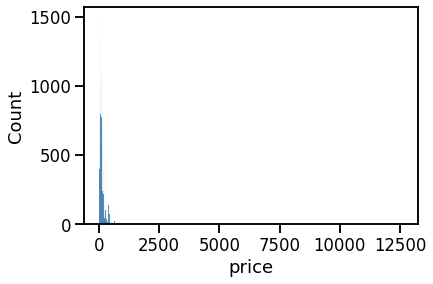

In [41]:
seaborn.histplot(airbnb_df.price.dropna())

Lo primero que se observa es que la distribución es muy asimétrica. Veamos un boxplot para ver información acerca de los cuartiles. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


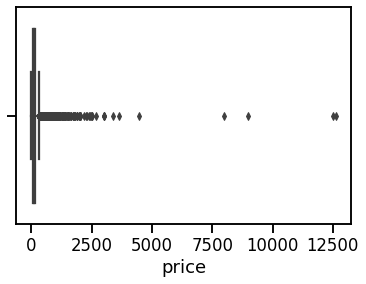

In [42]:
seaborn.boxplot(airbnb_df.price.dropna())

La mayoría de los valores parecen estar muy cerca del cero. No está claro con este gráfico. Veamos las medidas descriptivas en una tabla:

In [43]:
airbnb_df.price.describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

Acá vemos que el 75% de los datos tienen un precio de alquiler menor o igual a $165. Se observa con claridad que hay una fuerte presencia de valores extremos. También vemos que hay registros que tienen precio cero (min) que sería valores incorrectos que deberían ser nulos. Sin embargo, recordamos que en la tabla de nulos, y ceros, eran solo 21 ceros, por lo que podemos omitirlos sin problemas. Sería óptimo trabajar eliminando dichos valores extremos o bien usando la mediana en lugar del promedio (siendo la mediana más robusta a valores extremos).

Vemos que eliminando los valores superiores a $500 nos quedamos con el 97.5% de los datos, permitiéndonos trabajar con valores medidas de tendencia central más representativas. 

---



In [44]:
price_col='price'
k = 97.5
percentile_x = airbnb_df[price_col].quantile(k / 100).round()
n_above = len(airbnb_df[airbnb_df[price_col] > percentile_x])
print('Percentil {} de la columna {}: {}'.format(k, price_col, percentile_x))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(airbnb_df)))

Percentil 97.5 de la columna price: 500.0
% de datos mayor que percentil 97.5: 0.02367329111159642


Removemos los valores por encima de 500 e iguales a cero:

In [45]:
zero = [0]
airbnb_filtered = airbnb_df[~(airbnb_df.price.isin(zero)) & ~(airbnb_df.price > 500)]


In [46]:
airbnb_filtered.price.describe()

count    22332.000000
mean       128.640113
std         83.392368
min          1.000000
25%         71.000000
50%        109.000000
75%        161.000000
max        500.000000
Name: price, dtype: float64

Observamos que el mínimo es 1, lo cual sigue siendo raro. Parece un valor que sea nulo. Vemos qué tan frecuente es el dato:

In [47]:
airbnb_filtered1 = airbnb_df[~(airbnb_df.price < 2) & ~(airbnb_df.price > 500)]
len(airbnb_filtered)-len(airbnb_filtered1)

1

Nos quedamos con el filtro que también excluye el 1.

In [48]:
len(airbnb_filtered1)/len(airbnb_df)

0.975365800393099

Confirmamos que solo dejamos por fuera un 2.5% de los registros.

In [49]:
airbnb_filtered1.price.describe()

count    22331.000000
mean       128.645829
std         83.389861
min         12.000000
25%         71.000000
50%        109.000000
75%        161.000000
max        500.000000
Name: price, dtype: float64

Ahora si podemos ver que el 97.5% de los valores está entre un costo de \$12 y $500. Además parece que la media y la mediana siguen estando separadas. Vemos el histograma y el diagrama de cajas (boxplot) para entender como es la distribucion de la variable filtrada.

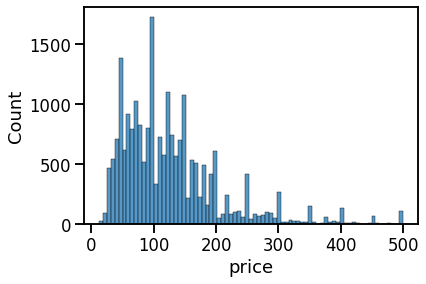

In [50]:
seaborn.histplot(airbnb_filtered1.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


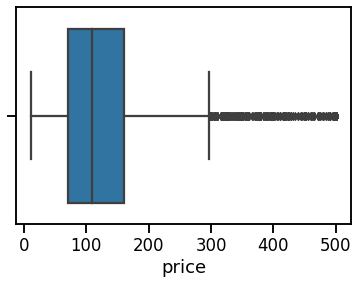

In [51]:
seaborn.boxplot(airbnb_filtered1.price)

La distribución resultante sigue teniendo un sesgo derecho importante, por lo que nos parece importante tomar también la mediana como transformación sobre la columna price. 

Construimos la tabla con la variable price transformada.


In [183]:
relevant_cols = ['price', 'zipcode']

# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).

airbnb_price_by_zipcode = airbnb_filtered1[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'median', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price median': 'airbnb_price_median',
             'price count': 'airbnb_record_count'}
)
airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_record_count
0,2010.0,40.0,40.0,1
1,2134.0,50.0,50.0,1
2,2582.0,104.0,104.0,1


Se observan algunos zipcodes con baja frecuencia. Analicemos esto para quedarnos con los zipcodes que tengan al menos una frecuencia mínima como indica la consigna:

In [184]:
airbnb_price_by_zipcode.airbnb_record_count.describe()

count     247.000000
mean       89.834008
std       256.742700
min         1.000000
25%         8.500000
50%        26.000000
75%        72.000000
max      3313.000000
Name: airbnb_record_count, dtype: float64

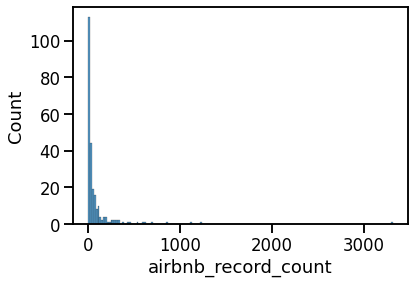

In [185]:
seaborn.histplot(airbnb_price_by_zipcode.airbnb_record_count)

Decidimos quedarnos con aquellos zipcodes que tengan al menos 8 registros.

In [186]:
airbnb_price_by_zipcode_filtered = airbnb_price_by_zipcode[~(airbnb_price_by_zipcode.airbnb_record_count < 8)]

In [187]:
zipcodes_descartados = airbnb_price_by_zipcode[(airbnb_price_by_zipcode.airbnb_record_count < 8)].zipcode

In [188]:
len(zipcodes_descartados)

58

In [189]:
len(airbnb_df[airbnb_df.zipcode.isin(zipcodes_descartados)])

211

In [190]:
len(airbnb_df[airbnb_df.zipcode.isin(zipcodes_descartados)])/len(airbnb_df)

0.009215986023149159

Del dataframe orginal estamos dejando fuera 211 filas de datos, que representan menos del 1% de los datos.

Hacemos la combinacion de los datasets (ahora con pandas en lugar de sql):

In [191]:
merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode_filtered, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_record_count
12276,Diamond Creek,17 Wentworth Cl,4,h,950000.0,SP,Barry,3/09/2017,21.8,3089.0,...,1995.0,NaN,-37.68001,145.1600,Northern Victoria,4258.0,NaN,NaN,NaN,NaN
13053,St Albans,29 Gillespie Rd,3,h,626000.0,S,YPA,19/08/2017,14.0,3021.0,...,1985.0,NaN,-37.73497,144.7864,Western Metropolitan,14042.0,3021.0,81.650000,56.5,20.0
6666,Yarraville,122 Stephen St,1,h,470000.0,PI,Jas,12/11/2016,7.0,3013.0,...,2004.0,Maribyrnong,-37.81730,144.8940,Western Metropolitan,6543.0,3013.0,135.609756,108.5,82.0
4811,Prahran,6 Wynnstay Rd,3,h,1240000.0,S,hockingstuart,4/03/2017,4.5,3181.0,...,NaN,Stonnington,-37.85270,145.0088,Southern Metropolitan,7717.0,3181.0,133.611111,112.0,450.0
6610,Yallambie,267 Yallambie Rd,3,h,753000.0,S,Barry,11/02/2017,15.0,3085.0,...,1975.0,Banyule,-37.72330,145.1045,Northern Metropolitan,1369.0,NaN,NaN,NaN,NaN


## Ejercicio 3:

 



Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [192]:
airbnb_price_by_zipcode_filtered.to_csv("airbnb_price_by_zipcode.csv", index=None)
merged_sales_df.to_csv("merged_sales.csv", index=None)

In [193]:
status(merged_sales_df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,314,object
1,Address,0,0.000000,0,0.000000,13378,object
2,Rooms,0,0.000000,0,0.000000,9,int64
3,Type,0,0.000000,0,0.000000,3,object
4,Price,0,0.000000,0,0.000000,2204,float64
5,Method,0,0.000000,0,0.000000,5,object
6,SellerG,0,0.000000,0,0.000000,268,object
7,Date,0,0.000000,0,0.000000,58,object
8,Distance,0,0.000000,6,0.000442,202,float64
9,Postcode,0,0.000000,0,0.000000,198,float64


In [62]:
#para descargar los datasets que acabamos de crear

# from google.colab import files
# files.download('airbnb_price_by_zipcode.csv')
# files.download('merged_sales.csv')

## Ejercicios opcionales:




1.   Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.
2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)


# Trabajo práctico entregable - Parte 2 - Grupo 23

En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas Suburb y las columnas obtenidas a partir del conjunto de datos airbnb.

En esta notebook, se utilizará resultado de dichas operaciones. que fue guardado en un archivo (Ejercicio 3 entregable 1).

In [194]:
merged_copy = merged_sales_df.copy()
print(merged_copy.shape)
merged_copy.head()

(13580, 25)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_record_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,118.189723,100.0,253.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,118.189723,100.0,253.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,118.189723,100.0,253.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,118.189723,100.0,253.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,118.189723,100.0,253.0


En el práctico anterior no habíamos seleccionado columnas de melb_df, sino únicamente de airbnb_df. Tampoco habíamos imputado filas de Suburb, pero se observa que la variable no tiene datos nulos ni cero.

Las columnas que elegimos son: `Suburb`, `Rooms`, `Type`, `Price`, `Date`, `Distance`, `Postcode`, `Bathroom`, `Car`, `BuildingArea`, `YearBuilt`, `Lattitude`, `Longtitude` y `Regionname` (además de las que surgieron del merge con airbnb). 
      
Quitamos `Landsize` porque tiene un 14% de registros con valor cero (dato faltante). `CouncilArea` por tener 10% de datos nulos. Method, Seller y Propertycount nos parecen poco relevantes. Elegimos `Rooms` en lugar de `Bedroom2` ya que como se vió en clase, la variable Rooms es más informativa y tiene menos datos faltantes o sucios (Bedroom2 tenía un máximo de 20 habitaciones y 16 registros iguales a cero).

In [196]:
int_cols_melb = ['Suburb', 'Rooms','Type', 'Price', 'Date', 'Distance', 'Postcode', \
                            'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', \
                            'Regionname' , 'airbnb_price_mean', 'airbnb_price_median', 'airbnb_record_count']
merged_filtered = merged_copy[int_cols_melb]
merged_filtered.head()

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,airbnb_price_mean,airbnb_price_median,airbnb_record_count
0,Abbotsford,2,h,1480000.0,3/12/2016,2.5,3067.0,1.0,1.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,118.189723,100.0,253.0
1,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067.0,1.0,0.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,118.189723,100.0,253.0
2,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067.0,2.0,0.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,118.189723,100.0,253.0
3,Abbotsford,3,h,850000.0,4/03/2017,2.5,3067.0,2.0,1.0,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,118.189723,100.0,253.0
4,Abbotsford,4,h,1600000.0,4/06/2016,2.5,3067.0,1.0,2.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,118.189723,100.0,253.0




Tenemos que hacer la imputación de la variable `Bathroom` para los casos en que esa variable es cero, de la misma forma que lo hicimos en clase.

In [197]:
merged_filtered.loc[merged_filtered.Bathroom<1,'Bathroom']=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [198]:
status(merged_filtered)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,314,object
1,Rooms,0,0.000000,0,0.000000,9,int64
2,Type,0,0.000000,0,0.000000,3,object
3,Price,0,0.000000,0,0.000000,2204,float64
4,Date,0,0.000000,0,0.000000,58,object
5,Distance,0,0.000000,6,0.000442,202,float64
6,Postcode,0,0.000000,0,0.000000,198,float64
7,Bathroom,0,0.000000,0,0.000000,8,float64
8,Car,62,0.004566,1026,0.075552,11,float64
9,BuildingArea,6450,0.474963,17,0.001252,602,float64


## Ejercicio 1: Encoding

1.   Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.
2.   Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:

1.   Utilizar OneHotEncoder junto con el parámetro categories para las variables categóricas y luego usar numpy.hstack para concatenar el resultado con las variables numéricas.
2.   DictVectorizer con algunos pasos de pre-proceso previo.


Recordar también que el atributo pandas.DataFrame.values permite acceder a la matriz de numpy subyacente a un DataFrame.

In [68]:
cat_cols = ['Type','Regionname']
num_cols = ['Rooms', 'Car','Bathroom']

In [69]:
merged_filtered[cat_cols].nunique()

Type          3
Regionname    8
dtype: int64

In [70]:
merged_filtered[num_cols].nunique()

Rooms        9
Car         11
Bathroom     8
dtype: int64

In [71]:
# Check for nulls
merged_filtered[cat_cols].isna().sum()

Type          0
Regionname    0
dtype: int64

In [72]:
merged_filtered[num_cols].isna().sum()

Rooms        0
Car         62
Bathroom     0
dtype: int64

Quitamos los 62 registros que no tenían información de la cochera para poder trabajar con las metodologías de Encoding.

In [73]:
merged_filtered.dropna(subset=['Car'],how='any',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [74]:
len(merged_copy) - len(merged_filtered)

62

In [75]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(merged_filtered[cat_cols])
# We can inspect the categories found by the encoder 
encoded_categories_cat = encoder.categories_

In [76]:
encoded_types_cat = encoder.transform(merged_filtered[cat_cols])
encoded_types_cat[:10]

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [77]:
encoder.fit(merged_filtered[num_cols])
# We can inspect the categories found by the encoder 
encoded_categories_num = encoder.categories_

In [78]:
encoded_types_num = encoder.transform(merged_filtered[num_cols])
encoded_types_num[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1

Concatenamos los resultados del OneHot Encoding para las variables categóricas y numéricas.

In [79]:
encoded_categories_num

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 10]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.])]

In [80]:
encoded_cat_num = numpy.hstack((encoded_types_cat,encoded_types_num))
encoded_cat_num

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método IterativeImputer para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.


1.   Agregue a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea.
2.   Aplique una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3.   Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [81]:
type(encoded_cat_num)

numpy.ndarray

In [82]:
encoded_df = pandas.DataFrame(encoded_cat_num,\
                              columns = ['type_h', 'type_t', 'type_u', 'regionname_eastern_metropolitan',\
                                         'regionname_eastern_victoria', 'regionname_northern_metropolitan', \
                                         'regionname_northern_victoria', 'regionname_south-eastern_metropolitan', \
                                         'regionname_southern_metropolitan', \
                                         'regionname_western_metropolitan', 'regionname_western_victoria',\
                                         'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'rooms_5', 'rooms_6', \
                                         'rooms_7', 'rooms_8', 'rooms_10', 'cars_0', 'cars_1', 'cars_2', 'cars_3', \
                                         'cars_4', 'cars_5', 'cars_6', 'cars_7', 'cars_8', 'cars_9', 'cars_10',\
                                          'bath_1', 'bath_2', 'bath_3', 'bath_4', 'bath_5', 'bath_6', 'bath_7', 'bath_8'])


In [83]:
encoded_df

,type_h,type_t,type_u,regionname_eastern_metropolitan,regionname_eastern_victoria,regionname_northern_metropolitan,regionname_northern_victoria,regionname_south-eastern_metropolitan,regionname_southern_metropolitan,regionname_western_metropolitan,...,cars_9,cars_10,bath_1,bath_2,bath_3,bath_4,bath_5,bath_6,bath_7,bath_8
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
encoded_and_yb_ba = pandas.concat([encoded_df, merged_filtered.YearBuilt.reindex(encoded_df.index)\
                                   , merged_filtered.BuildingArea.reindex(encoded_df.index)], axis=1)

In [85]:
encoded_and_yb_ba.head(3)

,type_h,type_t,type_u,regionname_eastern_metropolitan,regionname_eastern_victoria,regionname_northern_metropolitan,regionname_northern_victoria,regionname_south-eastern_metropolitan,regionname_southern_metropolitan,regionname_western_metropolitan,...,bath_1,bath_2,bath_3,bath_4,bath_5,bath_6,bath_7,bath_8,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0


In [86]:
status(encoded_and_yb_ba)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,type_h,0,0.000000,4129,0.305445,2,float64
1,type_t,0,0.000000,12404,0.917591,2,float64
2,type_u,0,0.000000,10503,0.776964,2,float64
3,regionname_eastern_metropolitan,0,0.000000,12050,0.891404,2,float64
4,regionname_eastern_victoria,0,0.000000,13465,0.996079,2,float64
5,regionname_northern_metropolitan,0,0.000000,9649,0.713789,2,float64
6,regionname_northern_victoria,0,0.000000,13478,0.997041,2,float64
7,regionname_south-eastern_metropolitan,0,0.000000,13068,0.966711,2,float64
8,regionname_southern_metropolitan,0,0.000000,8850,0.654683,2,float64
9,regionname_western_metropolitan,0,0.000000,10580,0.782660,2,float64


In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = encoded_and_yb_ba.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

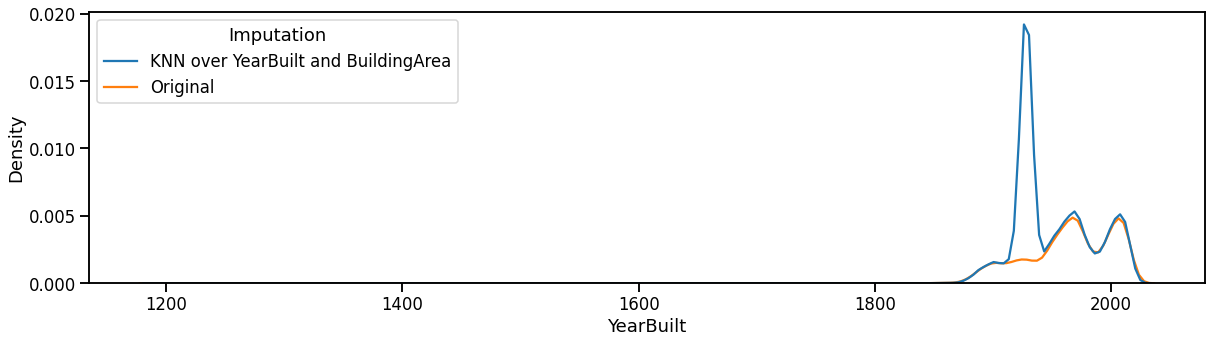

In [88]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = encoded_and_yb_ba.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build]).reset_index()
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

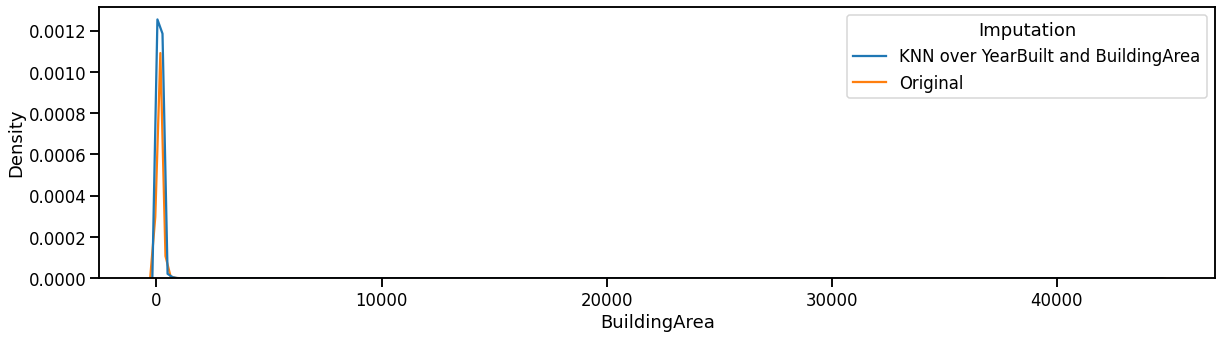

In [89]:
mice_area_built = melb_data_mice.BuildingArea.to_frame()
mice_area_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_area_build = encoded_and_yb_ba.BuildingArea.dropna().to_frame()
melb_area_build['Imputation'] = 'Original'
data = pandas.concat([mice_area_built, melb_area_build]).reset_index()
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

In [90]:
from sklearn.preprocessing import MinMaxScaler

YearBuilt = merged_filtered.YearBuilt.values.copy().reshape(-1,1)
YearBuilt_scaled = MinMaxScaler().fit_transform(YearBuilt)
YearBuilt_scaled_df = pandas.DataFrame(YearBuilt_scaled,columns = ['YearBuilt'])
BuildingArea = merged_filtered.BuildingArea.values.copy().reshape(-1,1)
BuildingArea_scaled = MinMaxScaler().fit_transform(BuildingArea)
BuildingArea_scaled_df = pandas.DataFrame(BuildingArea_scaled,columns = ['BuildingArea'])
encoded_and_yb_ba_scaled = pandas.concat([encoded_df, YearBuilt_scaled_df.reindex(encoded_df.index), BuildingArea_scaled_df.reindex(encoded_df.index)], axis=1)

In [91]:
melb_data_mice_scaled = encoded_and_yb_ba_scaled.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_scaled[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice_scaled[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


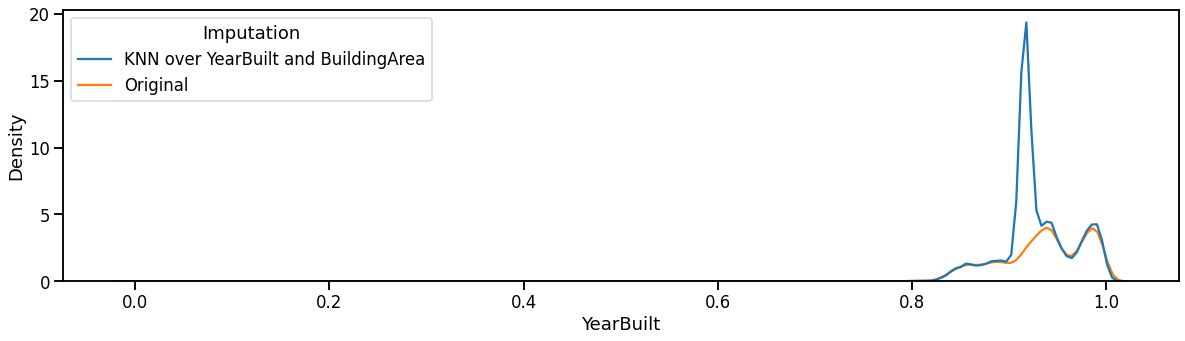

In [92]:
mice_year_built_scaled = melb_data_mice_scaled.YearBuilt.to_frame()
mice_year_built_scaled['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build_scaled = encoded_and_yb_ba_scaled.YearBuilt.dropna().to_frame()
melb_year_build_scaled['Imputation'] = 'Original'
data = pandas.concat([mice_year_built_scaled, melb_year_build_scaled]).reset_index()
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

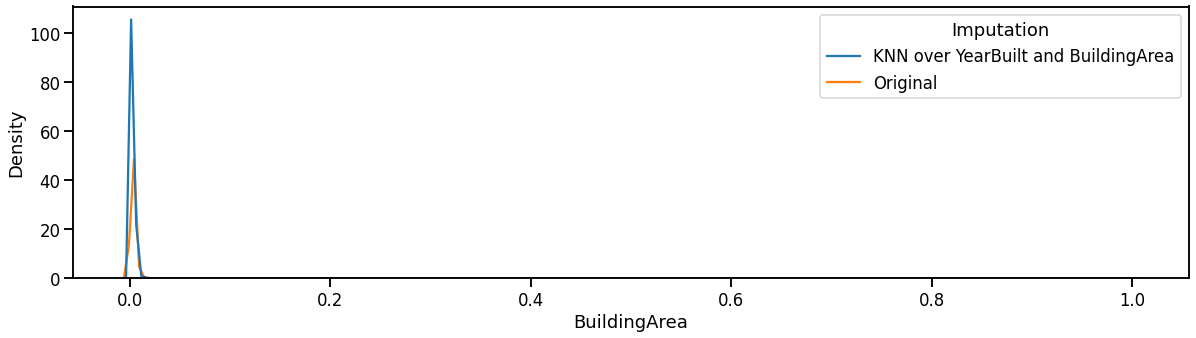

In [93]:
mice_area_built_scaled = melb_data_mice_scaled.BuildingArea.to_frame()
mice_area_built_scaled['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_area_build_scaled = encoded_and_yb_ba_scaled.BuildingArea.dropna().to_frame()
melb_area_build_scaled['Imputation'] = 'Original'
data = pandas.concat([mice_area_built_scaled, melb_area_build_scaled]).reset_index()
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:


1.   Aplique PCA para obtener n componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?
2.   Grafique la varianza capturada por los primeros n componentes principales, para cada n.
3.   En base al gráfico, seleccione las primeras m columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un pandas.DataFrame y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:

1.   El método OneHotEncoder.get_feature_names o el atributo OneHotEncoder.categories_ permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2.   Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [254]:
status(merged_copy)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,314,object
1,Address,0,0.000000,0,0.000000,13378,object
2,Rooms,0,0.000000,0,0.000000,9,int64
3,Type,0,0.000000,0,0.000000,3,object
4,Price,0,0.000000,0,0.000000,2204,float64
5,Method,0,0.000000,0,0.000000,5,object
6,SellerG,0,0.000000,0,0.000000,268,object
7,Date,0,0.000000,0,0.000000,58,object
8,Distance,0,0.000000,6,0.000442,202,float64
9,Postcode,0,0.000000,0,0.000000,198,float64


In [462]:
merged_columns = merged_copy[['Car','BuildingArea','YearBuilt','CouncilArea']]

In [464]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numerical_cols = merged_columns.select_dtypes(include=['float64', 'int']).columns.to_list()
categorical_cols = merged_columns.select_dtypes(include=['object', 'category']).columns.to_list()
new_columns = []

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numerical_cols),
                        ('cat', categorical_transformer, categorical_cols)
                    ],
                    remainder='passthrough'
                )


In [487]:
X_train_prep = preprocessor.fit_transform(merged_columns)

In [488]:
X_test_prep  = preprocessor.transform(merged_columns)

In [490]:
pandas.DataFrame(X_test_prep)

,0
0,"(0, 0)\t-0.636847024947872\n (0, 1)\t-0.034..."
1,"(0, 0)\t-1.677692204727882\n (0, 1)\t-0.154..."
2,"(0, 0)\t-1.677692204727882\n (0, 1)\t0.0264..."
3,"(0, 0)\t-0.636847024947872\n (0, 1)\t-0.034..."
4,"(0, 0)\t0.4039981548321378\n (0, 1)\t0.0060..."
...,...
13575,"(0, 0)\t0.4039981548321378\n (0, 1)\t-0.034..."
13576,"(0, 0)\t0.4039981548321378\n (0, 1)\t-0.016..."
13577,"(0, 0)\t2.4856885143921574\n (0, 1)\t-0.034..."
13578,"(0, 0)\t3.5265336941721674\n (0, 1)\t0.0442..."


In [443]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = categorical_cols
numerical_cols = numerical_cols
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = (merged_columns_train_prep[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))


# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, merged_columns_train_prep[numerical_cols]])
new_columns.extend(numerical_cols)


# Step 3: Append some new features, like PCA
# pca = PCA(n_components=2)
# pca_dummy_features = pca.fit_transform(X)
# X_pca = numpy.hstack([X, pca_dummy_features])
# new_columns.extend(['pca1', 'pca2'])

print("Matrix has shape {}, with columns: {}".format(merged_columns_train_prep.shape, new_columns))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

## Re-build dataframe
# processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
# processed_melb_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


IndexError: ignored

In [399]:
merged_columns_prep = preprocessor.fit_transform(merged_columns)

In [378]:
# # Convertir el output en dataframe y añadir el nombre de las columnas
# # ==============================================================================
# encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
# labels = numpy.concatenate([numeric_cols, encoded_cat])
# datos_train_prep = preprocessor.transform(merged_columns)
# datos_train_prep = pandas.DataFrame(datos_train_prep)
# datos_train_prep.head()

,0
0,"(0, 0)\t-0.6337801554835224\n (0, 1)\tnan\n..."
1,"(0, 0)\t-1.6726355140170808\n (0, 1)\t-0.13..."
2,"(0, 0)\t-1.6726355140170808\n (0, 1)\t-0.00..."
3,"(0, 0)\t-0.6337801554835224\n (0, 1)\tnan\n..."
4,"(0, 0)\t0.4050752030500361\n (0, 1)\t-0.018..."


## Ejercicio 5: Documentación

En un documento .pdf o .md realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:

1.   Criterios de exclusión (o inclusión) de filas
2.   Interpretación de las columnas presentes
3.   Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:


```
## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.

  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


  